3)Edge Detection

In [3]:
from google.colab import files
files.upload()   ###upload lighthouse image

Saving lighthouse.png to lighthouse.png


{'lighthouse.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xb3\x00\x00\x02\xb3\x08\x06\x00\x00\x00\r\xe7\x85\x1b\x00\x00\x01)iCCPICC Profile\x00\x00\x18\x95c``2ptqre\x12``\xc8\xcd+)\nrwR\x88\x88\x8cR`\xbf\xc0\xc0\xc1\xc0\xcd \xcc`\xcc`\x9d\x98\\\\\xe0\x18\x10\xe0\xc3\x00\x04y\xf9y\xa9\x0c\x18\xe0\xdb5\x06F\x10}Y\x17d\x16\xa6<^\xc0\x95\\PT\x02\xa4\xff\x00\xb1QJjq2\x03\x03\xa3\x01\x90\x9d]^R\x00\x14g\x9c\x03d\x8b$e\x83\xd9\x1b@\xec\xa2\x90 g \xfb\x08\x90\xcd\x97\x0ea_\x01\xb1\x93 \xec\' v\x11\xd0\x13@\xf6\x17\x90\xfat0\x9b\x89\x03l\x0e\x84-\x03b\x97\xa4V\x80\xecep\xce/\xa8,\xcaL\xcf(Q0200PpL\xc9OJU\x08\xae,.I\xcd-V\xf0\xccK\xce/*\xc8/J,IM\x01\xaa\x85\xb8\x0f\x0c\x04!\nA!\xa6ahii\xa1I\xa2\xbf\t\x02P<@X\x9f\x03\xc1\xe1\xcb(v\x06!\x86\x00\xc9\xa5EeP&#\x931a>\xc2\x8c9\x12\x0c\x0c\xfeK\x19\x18X\xfe \xc4Lz\x19\x18\x16\xe800\xf0OE\x88\xa9\x1920\x08\xe830\xec\x9b\x03\x00\xc3\xafPo\xec\xed\\\'\x00\x00\x00\tpHYs\x00\x00\x17\x12\x00\x00\x17\x12\x01g\x9f\xd2R\x00\x00 \x00IDATx\x9c\xec\xbd\

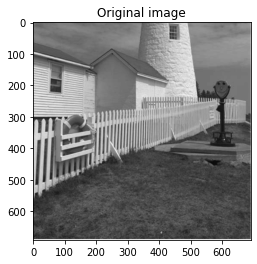

In [26]:
import matplotlib.pyplot as plt
import numpy as np

Input=plt.imread('lighthouse.png')  
I=np.array(Input[:,:,0])*1000
II=np.array(Input[:,:,0])
plt.title('Original image')
plt.imshow(I,cmap='gray')
#print(I)

Defining different functions necessary for gradient edge detectors

In [12]:
import numpy as np

###padding the image
def resize_img(img,filter):
  fr,fc=filter.shape
  s=img.shape
  row=s[0]+fr-1
  col=s[1]+fc-1
  a1=((fr/2))
  a2=((fc/2))
  N=np.zeros((row,col),int)
  for i in range(s[0]):
     for j in range(s[1]):
       N[i+np.int(a1),j+np.int(a2)]=img[i,j]
  return N

###convolution 
def convol(image,filter):
  fr,fc=filter.shape
  NJ=resize_img(image,filter)
  s=NJ.shape
  convd_rest=np.zeros(image.shape,int)
  for i in range(0,s[0]-fr+1):
    for j in range(0,s[1]-fc+1):
      a=NJ[i:i+fr,j:j+fc]
      res=a*filter
      convd_rest[i,j]=np.sum(res) 
  return convd_rest


###function for edge map from gradient magnitude
def edge_map(Mag,Thres):
  ed_mp=np.zeros(I.shape,float)
  for i in range(691):
    for j in range(691):
      if (Mag[i,j]>=Thres):
        ed_mp[i,j]=1
      elif (Mag[i,j]<Thres):
        ed_mp[i,j]=0  
  return ed_mp


3.1)(3.1.1a)Centered 2-D differencing gradient operation with (3.12) estimating gradient magnitudes and (3.13)plotting edge map E

Edge maps for centered 2-D differencing with different gradient magnitudes and Treshold


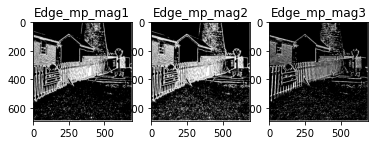

In [13]:
#####Centered 2-D differencing
cen_del_x=np.array([[-1,0,1]])/2
cen_del_y=(np.array([[-1,0,1]])/2).T

cen_res_x=convol(I,cen_del_x)
cen_res_y=convol(I,cen_del_y)

####computing 3 diff Gradient magnitudes 
c_M1=np.sqrt(((cen_res_x)**2)+((cen_res_y)**2))
c_M2=np.abs(cen_res_x)+np.abs(cen_res_y)
c_M3=np.maximum(cen_res_x,cen_res_y)

####Edge map 
c_ed_mp1=edge_map(c_M1,40)
plt.subplot(1,3,1)          
plt.title('Edge_mp_mag'+str(1))
plt.imshow(c_ed_mp1,cmap='gray')

c_ed_mp2=edge_map(c_M2,40)
plt.subplot(1,3,2)          
plt.title('Edge_mp_mag'+str(2))
plt.imshow(c_ed_mp2,cmap='gray')

c_ed_mp3=edge_map(c_M3,30)
plt.subplot(1,3,3)          
plt.title('Edge_mp_mag'+str(3))
plt.imshow(c_ed_mp3,cmap='gray')
  
print('Edge maps for centered 2-D differencing with different gradient magnitudes and Treshold')

3.1)(3.1.1b)gradient operation with Roberts_operator and (3.12) estimating gradient magnitudes and (3.13)plotting respective edge maps (E)

Edge maps using Roberts_operator for different gradient magnitudes and Tresholds


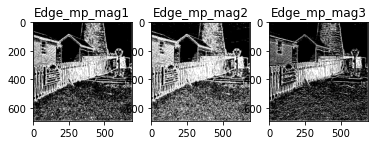

In [15]:
#####Roberts_operator
rob_del_x=np.array([[-1,0],[0,1]])
rob_del_y=(np.array([[0,-1],[1,0]]))

rob_res_x=convol(I,rob_del_x)
rob_res_y=convol(I,rob_del_y)

####computing 3 diff Gradient magnitudes 
r_M1=np.sqrt(((rob_res_x)**2)+((rob_res_y)**2))
r_M2=np.abs(rob_res_x)+np.abs(rob_res_y)
r_M3=np.maximum(rob_res_x,rob_res_y)

####Edge map 
r_ed_mp1=edge_map(r_M1,40)
plt.subplot(1,3,1)          
plt.title('Edge_mp_mag'+str(1))
plt.imshow(r_ed_mp1,cmap='gray')

r_ed_mp2=edge_map(r_M2,40)
plt.subplot(1,3,2)          
plt.title('Edge_mp_mag'+str(2))
plt.imshow(r_ed_mp2,cmap='gray')

r_ed_mp3=edge_map(r_M3,30)
plt.subplot(1,3,3)          
plt.title('Edge_mp_mag'+str(3))
plt.imshow(r_ed_mp3,cmap='gray')
  
print('Edge maps using Roberts_operator for different gradient magnitudes and Tresholds')

3.1)(3.1.1c)gradient operation with Prewitt operator and (3.12) estimating gradient magnitudes and (3.13)plotting respective edge maps (E)

Edge maps using Prewitt_operator for different gradient magnitudes and Tresholds


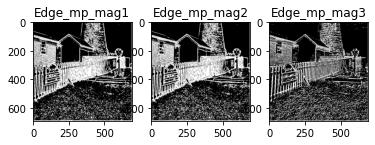

In [17]:
#####Prewitt operator.
prew_del_x=np.array([[-1,0,1],[-1,0,1],[-1,0,1]])/3
prew_del_y=np.array([[-1,-1,-1],[0,0,0],[1,1,1]])/3

prew_res_x=convol(I,prew_del_x)
prew_res_y=convol(I,prew_del_y)

####computing 3 diff Gradient magnitudes 
p_M1=np.sqrt(((prew_res_x)**2)+((prew_res_y)**2))
p_M2=np.abs(prew_res_x)+np.abs(prew_res_y)
p_M3=np.maximum(prew_res_x,prew_res_y)

####Edge map 
p_ed_mp1=edge_map(p_M1,50)
plt.subplot(1,3,1)          
plt.title('Edge_mp_mag'+str(1))
plt.imshow(p_ed_mp1,cmap='gray')

p_ed_mp2=edge_map(p_M2,60)
plt.subplot(1,3,2)          
plt.title('Edge_mp_mag'+str(2))
plt.imshow(p_ed_mp2,cmap='gray')

p_ed_mp3=edge_map(p_M3,30)
plt.subplot(1,3,3)          
plt.title('Edge_mp_mag'+str(3))
plt.imshow(p_ed_mp3,cmap='gray')
  
print('Edge maps using Prewitt_operator for different gradient magnitudes and Tresholds')

3.1)(3.1.1d)gradient operation with Sobel operator and (3.12) estimating gradient magnitudes and (3.13)plotting respective edge maps (E)

Edge maps using Sobel_operator for different gradient magnitudes and Tresholds


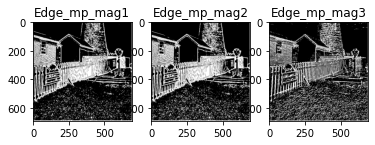

In [18]:
#####Sobel operator.
sob_del_x=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])/4
sob_del_y=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])/4

sob_res_x=convol(I,sob_del_x)
sob_res_y=convol(I,sob_del_y)

####computing 3 diff Gradient magnitudes 
s_M1=np.sqrt(((sob_res_x)**2)+((sob_res_y)**2))
s_M2=np.abs(sob_res_x)+np.abs(sob_res_y)
s_M3=np.maximum(sob_res_x,sob_res_y)

####Edge map 
s_ed_mp1=edge_map(s_M1,60)
plt.subplot(1,3,1)          
plt.title('Edge_mp_mag'+str(1))
plt.imshow(s_ed_mp1,cmap='gray')

s_ed_mp2=edge_map(s_M2,70)
plt.subplot(1,3,2)          
plt.title('Edge_mp_mag'+str(2))
plt.imshow(s_ed_mp2,cmap='gray')

s_ed_mp3=edge_map(s_M3,30)
plt.subplot(1,3,3)          
plt.title('Edge_mp_mag'+str(3))
plt.imshow(s_ed_mp3,cmap='gray')
  
print('Edge maps using Sobel_operator for different gradient magnitudes and Tresholds')


3.2)Laplacian edge detector

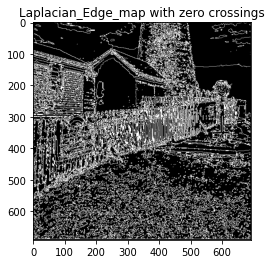

In [80]:
###Laplacian edge detector
lap_temp=np.array([[0,1,0],[1,-4,1],[0,1,0]])
lap_res=convol(Input[:,:,0]*10,lap_temp)
#print(lap_res)
ed=np.zeros(I.shape,float)

###detecting zero crossings to compute Edge map 
for i in range(0,689):
  for j in range(0,689):
    a=(((lap_res[i,j])*(lap_res[i+1,j]))<0)
    b=(((lap_res[i,j])*(lap_res[i,j+1]))<0)
    c=((((lap_res[i,j])*(lap_res[i,j+2]))<0)and((lap_res[i,j+1])==0))
    d=((((lap_res[i,j])*(lap_res[i+2,j]))<0)and((lap_res[i+1,j])==0))
    if ((a)or(b)or(c)or(d)):
      ed[i,j]=1
    else:
      ed[i,j]=0

plt.title('Laplacian_Edge_map with zero crossings')
plt.imshow(ed,cmap='gray')

3.3)Laplacian of Gaussian(LoG)

Edge maps after zero crossing detector using LoG


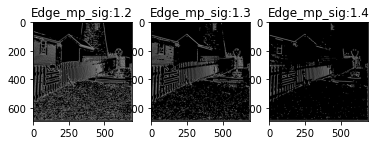

In [78]:

###LoG filter
def LoG_fil_(sigma):
  LoG=np.zeros((7,7),float)
  for i in range(-3,4):
    for j in range(-3,4):
      sig=sigma
      r_sq=((i)**2)+((j)**2)
      cons=(1-((r_sq)/(2*((sig)**2))))
      cons2=(np.pi*((sig)**4))
      LoG[i+3,j+3]=-cons*(np.exp(-((r_sq)/(2*(sig**2)))))/cons2
  return LoG

##adding noise to original image
n=np.random.normal(0,10)
noised_I=I*2+n

###detecting zero crossings to compute Edge map 
def zero_crs_det(LoG_res): 
  ed_mp_LoG=np.zeros(I.shape,float) 
  for i in range(0,689):
    for j in range(0,689):
      a_LoG=(((LoG_res[i,j])*(LoG_res[i+1,j]))<0)
      b_LoG=(((LoG_res[i,j])*(LoG_res[i,j+1]))<0)
      c_LoG=((((LoG_res[i,j])*(LoG_res[i,j+2]))<0)and((LoG_res[i,j+1])==0))
      d_LoG=((((LoG_res[i,j])*(LoG_res[i+2,j]))<0)and((LoG_res[i+1,j])==0))
      if ((a_LoG)or(b_LoG)or(c_LoG)or(d_LoG)):
        ed_mp_LoG[i,j]=1
      else:
        ed_mp_LoG[i,j]=0
  return ed_mp_LoG

##experimenting with diff sigma
##sigma=1.2
log_f1=LoG_fil_(1.2)
LoG_res1=convol(noised_I,log_f1)
ed_mp1=zero_crs_det(LoG_res1)
##sigma=1.3
log_f2=LoG_fil_(1.3)
LoG_res2=convol(noised_I,log_f2)
ed_mp2=zero_crs_det(LoG_res2)
##sigma=1.4
log_f3=LoG_fil_(1.4)
LoG_res3=convol(noised_I,log_f3)
ed_mp3=zero_crs_det(LoG_res3)

plt.subplot(1,3,1)
plt.title('Edge_mp_sig:1.2')
plt.imshow(ed_mp1,cmap='gray')
plt.subplot(1,3,2)
plt.title('Edge_mp_sig:1.3')
plt.imshow(ed_mp2,cmap='gray')
plt.subplot(1,3,3)
plt.title('Edge_mp_sig:1.4')
plt.imshow(ed_mp3,cmap='gray')

print('Edge maps after zero crossing detector using LoG')

Verifying the robustness of LoG

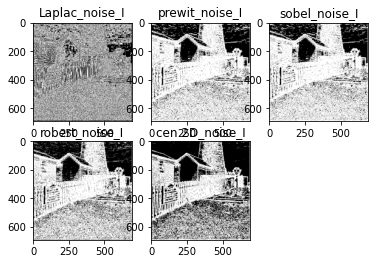

In [87]:
##laplacian edge det for noised I
lap_noised_I=convol(noised_I,lap_temp)
ed_mp_lap=zero_crs_det(lap_noised_I)
plt.subplot(2,3,1)
plt.title('Laplac_noise_I')
plt.imshow(ed_mp_lap,cmap='gray')

##############prewitt edge det for noised I
prew_noised_Ix=convol(noised_I,prew_del_x)
prew_noised_Iy=convol(noised_I,prew_del_y)
####computing Gradient magnitudes 
p_noi_M1=np.sqrt(((prew_noised_Ix)**2)+((prew_noised_Iy)**2))
####Edge map 
p_ed_mp_noi=edge_map(p_noi_M1,30)
plt.subplot(2,3,2)          
plt.title('prewit_noise_I')
plt.imshow(p_ed_mp_noi,cmap='gray')

##############sobel edge det for noised I
sob_noised_Ix=convol(noised_I,sob_del_x)
sob_noised_Iy=convol(noised_I,sob_del_y)
####computing Gradient magnitudes 
s_noi_M1=np.sqrt(((sob_noised_Ix)**2)+((sob_noised_Iy)**2))
####Edge map 
s_ed_mp_noi=edge_map(s_noi_M1,30)
plt.subplot(2,3,3)          
plt.title('sobel_noise_I')
plt.imshow(s_ed_mp_noi,cmap='gray')


##############roberts edge det for noised I
rob_noised_Ix=convol(noised_I,rob_del_x)
rob_noised_Iy=convol(noised_I,rob_del_y)
####computing Gradient magnitudes 
r_noi_M1=np.sqrt(((rob_noised_Ix)**2)+((rob_noised_Iy)**2))
####Edge map 
r_ed_mp_noi=edge_map(r_noi_M1,30)
plt.subplot(2,3,4)          
plt.title('robert_noise_I')
plt.imshow(r_ed_mp_noi,cmap='gray')


##############Cent 2-D diff edge det for noised I
cen_noised_Ix=convol(noised_I,cen_del_x)
cen_noised_Iy=convol(noised_I,cen_del_y)
####computing Gradient magnitudes 
c_noi_M1=np.sqrt(((cen_noised_Ix)**2)+((cen_noised_Iy)**2))
####Edge map 
c_ed_mp_noi=edge_map(c_noi_M1,30)
plt.subplot(2,3,5)          
plt.title('cen 2D_noise_I')
plt.imshow(c_ed_mp_noi,cmap='gray')


From the above edge detection plots(Laplacian and other gradient edge detectors) for noisy image, it clearly shows that, Edge detection using LoG is more robust to noise compared to all above methods

2)SSIM_INDEX

In [88]:
import numpy as np
import matplotlib.pyplot as plt
### w filter
def w_fil(sigma):
  w=np.zeros((11,11),float)
  for i in range(-5,6):
    for j in range(-5,6):
      sig=sigma
      r_sq=((i)**2)+((j)**2)
      cons=(1-((r_sq)/(sig)**2))
      c=2*np.pi*((sig)**2)
      w[i+5,j+5]=(np.exp(-(((i)**2)+((j)**2))/(2*(sig**2))))
  return w
filt_w=w_fil(0.1)


In [91]:

### function for mean calculation
def mean(image,filter):
  fr,fc=filter.shape
  NJ1=resize_img(image,filter)
  s=NJ1.shape
  u_rest=np.zeros(image.shape,float)
  for i in range(1,s[0]-fr+1):
    for j in range(1,s[1]-fc+1):
      a1=NJ1[i-1:i+fr-1,j-1:j+fc-1]
      res1=a1*filter
      u_rest[i,j]=np.sum(res1) 
  return u_rest

###luminance similarity
def luminance(u_I,u_J):
  h,w=I.shape
  L=np.zeros((h,w),float)
  for i in range(h):
    for j in range(w):
      a=(u_I[i,j])
      b=(u_J[i,j])
      c1=(2.55)**2
      numer1=2*a*b+c1
      denom1=((a**2)+(b**2)+c1)
      L[i,j]=numer1/denom1
  return L

###sigma I
def std_Img(image,mean,filter):
  fr,fc=filter.shape
  NI=resize_img(image,filter)
  s=NI.shape
  var_rest=np.zeros(image.shape,float)
  for i in range(1,s[0]-fr+1):
    for j in range(1,s[1]-fc+1):
      mu=mean[i,j]
      a2=(NI[i-1:i+fr-1,j-1:j+fc-1]-mu)**2
      res2=a2*filter
      var_rest[i,j]=np.sqrt((np.sum(res2)))
  return var_rest

###constrast similarity
def contrast_sim(std_I,std_J):
  h,w=I.shape
  C=np.zeros((h,w),float)
  for i in range(h):
    for j in range(w):
      ac=(std_I[i,j])
      bc=(std_J[i,j])
      c2=(7.65)**2
      numer2=2*ac*bc+c2
      denom2=((ac**2)+(bc**2)+c2)
      C[i,j]=numer2/denom2
  return C

####sigma I,J
def var_IJ(image1,mean1,image2,mean2,filter):
  fr,fc=filter.shape
  N_I=resize_img(image1,filter)
  N_J=resize_img(image2,filter)
  s=N_I.shape
  var_IJ_rest=np.zeros(I.shape,float)
  for i in range(1,s[0]-fr+1):
    for j in range(1,s[1]-fc+1):
      u1=mean1[i,j]
      u2=mean2[i,j]
      a3=(N_I[i-1:i+fr-1,j-1:j+fc-1]-u1)*(N_J[i-1:i+fr-1,j-1:j+fc-1]-u2)
      res3=a3*filter
      var_IJ_rest[i,j]=((np.sum(res3)))
  return var_IJ_rest

###structural similarity
def structural_sim(var_ij,std_i,std_j):
  h,w=I.shape
  S=np.zeros((h,w),float)
  for i in range(h):
    for j in range(w):
      v=var_ij[i,j]
      sa=(std_i[i,j])
      sb=(std_j[i,j])
      c2=(7.65)**2
      c3=c2/2
      numer3=v+c3
      denom3=((sa)*(sb)+c3)
      S[i,j]=numer3/denom3
  return S

  

In [97]:
###Computing SSIM
def SSIM_IJ(L_IJ,C_IJ,S_IJ):
  h,w=I.shape
  SSIM=np.zeros((h,w),float)
  for i in range(h):
    for j in range(w):
      l=L_IJ[i,j]
      c=C_IJ[i,j]
      s=S_IJ[i,j]
      SSIM[i,j]=l*c*s
  mean_SSIM=np.mean(SSIM)
  return SSIM,mean_SSIM


####SSIM Map and Mean_SSIM
def SSIM_map(I,J,filt_w):
  mean_I=mean(I,filt_w)
  mean_J=mean(J,filt_w)
  lum=luminance(mean_I,mean_J)
  std_I=std_Img(I,mean_I,filt_w)
  std_J=std_Img(J,mean_J,filt_w)
  cont=contrast_sim(std_I,std_J)
  v_IJ=var_IJ(I,mean_I,J,mean_J,filt_w)
  struc=structural_sim(v_IJ,std_I,std_J)
  ssim_mp,ssim_mean=SSIM_IJ(lum,cont,struc)
  return ssim_mp,ssim_mean



M_SSIM:-0.37353020127818637


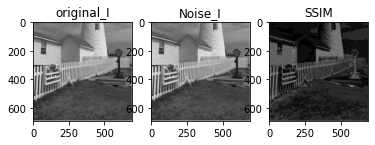

In [136]:
####SSIM map between Original image and noise added image

n=np.random.normal(0,10)
noise_I3=II*10+n
ssim_n3,m_ssim3=SSIM_map(II*10,noise_I3,filt_w)


plt.subplot(1,3,1)
plt.title('original_I')
plt.imshow(II*10,cmap='gray')
plt.subplot(1,3,2)
plt.title('Noise_I')
plt.imshow(noise_I3,cmap='gray')
plt.subplot(1,3,3)
plt.title('SSIM')
plt.imshow(ssim_n3,cmap='gray')
print('M_SSIM:'+str(m_ssim3))


M_SSIM:0.6127491738102144


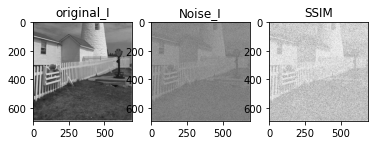

In [139]:
####SSIM map between Original image and noise added image

n=np.random.normal(0,5,(691,691))
noise_I3=II*10+n
ssim_n3,m_ssim3=SSIM_map(II*10,noise_I3,filt_w)


plt.subplot(1,3,1)
plt.title('original_I')
plt.imshow(II*10,cmap='gray')
plt.subplot(1,3,2)
plt.title('Noise_I')
plt.imshow(noise_I3,cmap='gray')
plt.subplot(1,3,3)
plt.title('SSIM')
plt.imshow(ssim_n3,cmap='gray')
print('M_SSIM:'+str(m_ssim3))


M_SSIM:0.17386855960581973


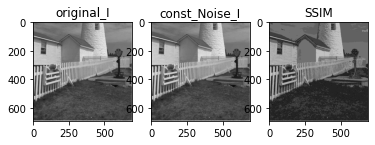

In [135]:
####SSIM map between Original image and const added image

n=np.random.normal(0,10)
noise_I2=II*10+10
ssim_n2,m_ssim2=SSIM_map(II*10,noise_I3,filt_w)

plt.subplot(1,3,1)
plt.title('original_I')
plt.imshow(II*10,cmap='gray')
plt.subplot(1,3,2)
plt.title('const_Noise_I')
plt.imshow(noise_I3,cmap='gray')
plt.subplot(1,3,3)
plt.title('SSIM')
plt.imshow(ssim_n2,cmap='gray')
print('M_SSIM:'+str(m_ssim2))


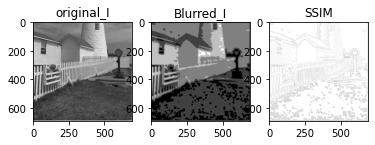

In [134]:
####SSIM map between Original image and blurred image
##avg filter for blurring th image
def avg_filter(I):
  M=11
  H=np.ones((M,M),int)/(M*M)
  NJ=resize_img(I,H)
  s=NJ.shape
  K=np.zeros(I.shape,int)
  for i in range(0,s[0]-M+1):
    for j in range(0,s[1]-M+1):
      a=NJ[i:i+M,j:j+M]
      res=a*H
      K[i,j]=np.sum(res) 

  return K

blur_img=avg_filter(II*5)
ssim_blur,m_b_ssim=SSIM_map(II*5,blur_img,filt_w)
plt.subplot(1,3,1)
plt.title('original_I')
plt.imshow(II*5,cmap='gray')
plt.subplot(1,3,2)
plt.title('Blurred_I')
plt.imshow(blur_img,cmap='gray')
plt.subplot(1,3,3)
plt.title('SSIM')
plt.imshow(ssim_blur,cmap='gray')


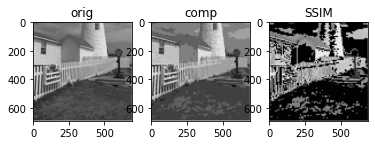

In [122]:
####SSIM map between Original image and compressed image

### for compressed image
import skimage.io as sky
import cv2
sky.imsave('lighthouse1.jpeg',Input[:,:,0])
img_orig=cv2.imread('lighthouse1.jpeg')
compress=sky.imsave('lighthouse_comp.jpeg',img_orig,quality=1)
comp_img=cv2.imread('lighthouse_comp.jpeg')
ssim_comp,m_c_ssim=SSIM_map(II*100,comp_img[:,:,0]*100,filt_w)

plt.subplot(1,3,1)
plt.title('orig')
plt.imshow(I,cmap='gray')
plt.subplot(1,3,2)
plt.title('comp')
plt.imshow(comp_img,cmap='gray')
plt.subplot(1,3,3)
plt.title('SSIM')
plt.imshow(ssim_comp,cmap='gray')


1)Motion estimation

In [240]:
######first ques

import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
files.upload()
files.upload()

Saving first_frame.png to first_frame (1).png


Saving second_frame.png to second_frame.png


{'second_frame.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xb0\x00\x00\x00\x90\x08\x00\x00\x00\x00\x8dp\xbe\xb4\x00\x00N\xdcIDATx\x9cl\xbc\xf5{\x9cW\x9a-\xaa\xbfcN\x92\xf3\xeb}\x9e;3M\x93\xeeN:\x1c3\x88\x99Y%\x153\xb3\xaaJUb\xb4$3s\x0c\x92\xc5X\xcc\xccU"\xdb\x89c;=?\xdf\xf3\x9c{\xa7\xef\xda\x9f\xec@\xcf)\x8b")\xf6\xaa\xf7[\xefz\xd7\xda{\x7fU\xf0\x7f\xa7\xff\xf1\xbf\xfe\xf7?\xfe\xeb\xff\xfb\xdf\xff\xef?\xfe\xf1\x8f\xff\xc2\xe7\xff\xfa\xc7\x7f\xfd\xe3\x1f\xff\xeb\xef\xfb\xfb\xcf\x0fv\xf1\xbew\xf0\xfd\x0f;\x9b\xe7/\xdcZOfS\xa9\xccN>\x9b\xce\xe6\xf2\x99\xfcn.\x9f\xcf\xed\xec\xec\xed\xa4\x13\xe9\xfc~\xd2zg|lbz\xc8l\x10\n\x0cs;\xfb\xbb{{;\xf9\x94+\x96\x8fF\xc2\x91X,\xb3,\x91\x9a\xf5\x92Ag4\x14\x8b%R\xf1d2\x1a\x8e\xc5\x82\xb6\r\xbb\xfd\x92\xd6\xe2\xca\x84\x13\xc9t&\x11\t\x86\xfc\xbe\xcd>\xce\xe8\x96?\x1a\r\x86\x82vo\xf4\x1eo\xd0\x15\xf69\xd6\x97l\x9ek\\\xd5\xbc-\xbaY\xf0{\xe7v\xece \xb1\x1c\x0b\xad\xfc?N_x1mw\xfegx%\xf1\xf7\xe7\x07x\xec\xed=\xff\xe1\xd5\xee\xf6\xc5\xe1+K\xdeX"\x11

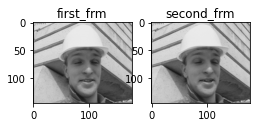

In [247]:

fir_f=plt.imread('first_frame (1).png')
sec_f=plt.imread('second_frame.png')

plt.subplot(1,3,1)
plt.title('first_frm')
plt.imshow(fir_f,cmap='gray')
plt.subplot(1,3,2)
plt.title('second_frm')
plt.imshow(sec_f,cmap='gray')

In [ ]:
h1,w1=fir_f.shape
for i in range(0,h1):
  for j in range(0,w1):
    block=fir_f[i:i+16,j:j+16]